# RockScisserPaper

## 루브릭 평가

1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
    - 트레이닝이 정상적으로 수행되었음
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
    - 데이터셋의 다양성, 정규화 등의 시도가 적절하였음
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?
    - 60% 이상 도달하였음

In [10]:
# 사용할 라이브러리
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [11]:
# 이미지 크기를 28X28로 변경하는 함수
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    target_size=(64,64)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "images resized.")

In [12]:
#가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/data/scissor"
resize_images(image_dir_path)
#바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/data/rock"
resize_images(image_dir_path)
#보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/data/paper"
resize_images(image_dir_path)

1103 images to be resized.
1103 images resized.
1103 images to be resized.
1103 images resized.
1103 images to be resized.
1103 images resized.


In [14]:
#훈련 데이터 함수
def load_data(img_path, number_of_data=3309):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/exploration_1/data"

(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# 훈련 데이터 reshape 하기
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
x_train_reshaped=x_train_norm.reshape( -1, 64, 64, 3)
print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

학습데이터(x_train)의 이미지 개수는 3309 입니다.
x_train shape: (3309, 64, 64, 3)
y_train shape: (3309,)
Before Reshape - x_train_norm shape: (3309, 64, 64, 3)
After Reshape - x_train_reshaped shape: (3309, 64, 64, 3)


In [15]:
# 테스트 데이터 가져와 리사이즈 하기
test_image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/test/scissor"
resize_images(test_image_dir_path)
test_image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/test/rock"
resize_images(test_image_dir_path)
test_image_dir_path = os.getenv("HOME") +"/aiffel/aiffel_project/exploration_1/test/paper"
resize_images(test_image_dir_path)

# 테스트 데이터 함수
def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/aiffel_project/exploration_1/test"

(x_test, y_test)=load_data_test(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

# 테스트 데이터 reshape 하기
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))
x_test_reshaped=x_test_norm.reshape( -1, 64, 64, 3)
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

100 images to be resized.
100 images resized.
100 images to be resized.
100 images resized.
100 images to be resized.
100 images resized.
테스트 데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 64, 64, 3)
y_test shape: (300,)
Before Reshape - x_test_norm shape: (300, 64, 64, 3)
After Reshape - x_test_reshaped shape: (300, 64, 64, 3)


## 이미지 확인

라벨:  0


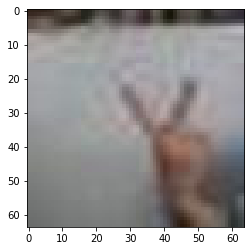

In [16]:
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계

In [41]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
# n_channel_3=128
# n_dense_1=64
n_dense_2=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

# model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))

# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(n_dense_1, activation='relu'))
# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense_2, activation='relu'))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                802880    
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

In [42]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
results = model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

print('테스트 결과')
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/20
104/104 [==============================] - 1s 5ms/step - loss: 0.9388 - accuracy: 0.5397
Epoch 2/20
104/104 [==============================] - 0s 4ms/step - loss: 0.5025 - accuracy: 0.8042
Epoch 3/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.9072
Epoch 4/20
104/104 [==============================] - 0s 4ms/step - loss: 0.1667 - accuracy: 0.9468
Epoch 5/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9785
Epoch 6/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0553 - accuracy: 0.9876
Epoch 7/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0491 - accuracy: 0.9891
Epoch 8/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9976
Epoch 9/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0163 - accuracy: 0.9958
Epoch 10/20
104/104 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9958

In [35]:
print(results.history.keys())

dict_keys(['loss', 'accuracy'])


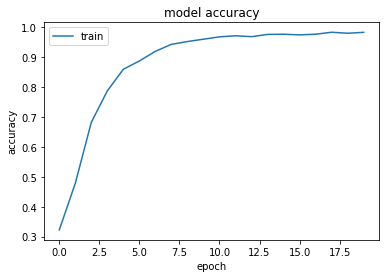

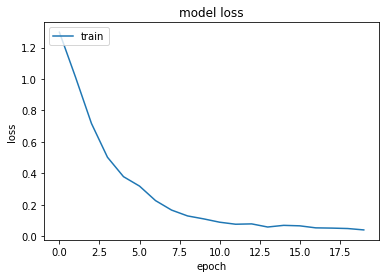

In [36]:
plt.plot(results.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 회고

### 사용한 데이터
훈련 데이터 1103 * 3개  
테스트 데이터 100 * 3개
### 기록
- 처음 정규화를 하지 않고 돌렸을때 test_accuracy가 0.03 test_loss가 10이상이 나왔다가 정규화를 하고 난 후에는 test_accuracy가 30퍼에 lose가 2점때가 나왔다. 

- 3번째 시도 : 층을 증가 시켜 보았다. 
        - 추가 했던 코드
            - 결과 : test_accuracy: 0.47333332896232605, test_loss: 1.7697465419769287 
            - 층을 늘리고 대략 17퍼 이상 올라가고 loss도 줄어들었다.
```python
n_channel_3=64
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
```
- 4번째 시도 : epoch을 20으로 증가 시켜 보았다.
        - 결과 test_accuracy : 0.5133333206176758, test_loss: 2.3954508304595947 
        - accuracy가 0.04 증가하고 loss도 0.06증가 하였다.
        
- 5번째 시도 : n_dense의 수를 32 -> 64로 증가 시켜 보았다.
        - 결과 test_accuracy: 0.550000011920929, test_loss: 1.751854419708252 
        - accuracy가 0.04 증가했고 이번에는 loss가 1.7로 다시 줄어들었다.

- 6번째 시도 : epoch을 30을 증가 시켜 보았다.
        - 결과: test_accuracy: 0.5133333206176758, test_loss: 2.1954345703125 
        - epoch은 적당량 이상 돌리면 오히려 점수가 낮아지는 것을 확인 했다.
        
- n_dense, epoch, 늘린 층을 삭제등 여러번 돌렸을때 test_accuracy: 47 ~ 55, 나오고 loss 같은 경우 1.7 ~ 2.4사이가 나왔다.

- 늘린 층을 삭제후 n_channel_1,n_channel_2 숫자를 각가 32, 64로 변경하였고 n_dense을 64, epoch 20으로 돌렸다
    - test_accuracy: 0.6366666555404663, test_loss: 1.0639227628707886 는 결과가 나왔다. 